_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
%cd instacart_2017_05_01

In [0]:
!ls -lh *.csv

# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [0]:
!ls -lh *.csv

For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [0]:
import pandas as pd
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

### departments

In [0]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

### order_products__prior

In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

### order_products__train

In [0]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

In [0]:
!free -m

### orders

In [0]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

### products

In [0]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

## Concatenate order_products__prior and order_products__train

In [0]:
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()

In [0]:
order_products.isna().sum()

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [0]:
orders.head(1)

In [0]:
columns = ['order_id',	'user_id',	'order_number',	'order_dow',	'order_hour_of_day']
subset = orders.loc[(orders.user_id == 1) & (orders.order_number <= 2), columns]
subset

## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [0]:
display(example)

Merge with columns from `products`

In [0]:
merged = pd.merge(subset, order_products[['order_id', 'add_to_cart_order', 'product_id']], how='left', on='order_id')
merged.head(10)

In [0]:
subset.shape, order_products.shape, merged.shape

In [0]:
products.head(1)

In [0]:
final = pd.merge(merged, products[['product_id',	'product_name']], how='left', on='product_id')

In [0]:
final

# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [0]:
table1

"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [0]:
table2

"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [0]:
table1

In [0]:
table1.columns

In [0]:
table1 = table1.reset_index()
table1

In [0]:
tidy = table1.melt(id_vars='index')
tidy

In [0]:
tidy = tidy.rename(columns={'index':'name', 'variable': 'trt', 'value': 'result'})
tidy['trt'] = tidy.trt.str.replace('treatment', '')
tidy

## Table 2 --> Tidy

In [0]:
##### LEAVE BLANK --an assignment exercise #####

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [0]:
wide = tidy.pivot_table(values='result', index='name', columns='trt')
wide

## Tidy --> Table 2

In [0]:
##### LEAVE BLANK --an assignment exercise #####

# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

In [0]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [0]:
product_names = ['Half And Half Ultra Pasteurized', 'Half Baked Frozen Yogurt']

In [0]:
products.columns.to_list()

In [0]:
orders.columns.to_list()

In [0]:
order_products.columns.to_list()

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['product_id', 'order_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))
merged

In [0]:
condition = ((merged['product_name'] == product_names[0]) |
            (merged['product_name'] == product_names[1]))

# Other approach that works
condition = merged['product_name'].isin(product_names)

In [0]:
subset = merged[condition]
print(subset.shape)
subset.head()

## 4 ways to reshape and plot

### 1. value_counts

In [0]:
subset.groupby('order_hour_of_day').product_name.value_counts().unstack().plot()

### 2. crosstab

In [0]:
pd.crosstab(subset['order_hour_of_day'], subset['product_name'], normalize='columns').plot()

### 3. Pivot Table

In [0]:
subset.pivot_table(index='order_hour_of_day', columns='product_name')

### 4. melt

# Assignment

## Join Data Section

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

### Join Data Section

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
%cd instacart_2017_05_01

In [0]:
import pandas as pd
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

In [0]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

In [0]:
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()

In [0]:
merged = (products[['product_id', 'product_name']].merge(order_products[['product_id', 'order_id', 'add_to_cart_order']]))
merged.head()

In [0]:
# So technically, these items were added to the cart more; however, some of them were not ordered more than other items.
merged.groupby('product_name').add_to_cart_order.sum().sort_values(ascending=False)[:10]

In [0]:
merged.product_name.value_counts()[:10]

In [0]:
product_names = ['Banana',
'Bag of Organic Bananas',
'Organic Strawberries',
'Organic Baby Spinach',
'Organic Hass Avocado',
'Organic Avocado',
'Large Lemon',
'Strawberries',
'Limes',
'Organic Whole Milk']

In [0]:
condition = merged['product_name'].isin(product_names)

In [0]:
subset = merged[condition]
print(subset.shape)
subset.head()

In [0]:
subset.groupby('product_name').add_to_cart_order.sum().sort_values(ascending=False)[:10]

### Reshape Data Section

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

In [0]:
table2

In [0]:
table2 = table2.reset_index()
table2

In [0]:
tidy = table2.melt(id_vars='index')
tidy

In [0]:
tidy = tidy.rename(columns={'index': 'trt', 'variable': 'name', 'value': 'result'})
tidy

In [0]:
tidy['trt'] = tidy.trt.str.replace('treatment', '')
tidy

In [0]:
# Now lets use pivot table
wide = tidy.pivot_table(values='result', index='trt', columns='name')
wide

### Seaborn flights data

In [0]:
flights = sns.load_dataset('flights')

In [0]:
flights

In [0]:
flights = flights.pivot_table(index='year', columns='month')
flights

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-07-28 21:11:38--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.96.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.96.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  33.9MB/s    in 6.1s    

2019-07-28 21:11:44 (32.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
import pandas as pd
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
order_products = pd.concat([order_products__prior, order_products__train])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
df = (products[['product_id', 'product_name']]
      .merge(order_products[['product_id', 'order_id', 'add_to_cart_order']])
      .merge(orders[['order_id', 'order_hour_of_day']]))
print(df.shape)
df.head()



(33819106, 5)


,product_id,product_name,order_id,add_to_cart_order,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,7,11
1,769,Sliced American Cheese,1107,10,11
2,6184,Clementines,1107,14,11
3,8048,Packaged Grape Tomatoes,1107,15,11
4,9007,Frosted Flakes,1107,17,11


In [0]:
# Now we can simplify our dataset by getting all items
# that have been ordered more than 2900 times

# Here we have test = list of number of orders 
# values = product name for each order
test = df.product_name.value_counts().tolist()
values = df.product_name.value_counts().keys().tolist()

all_orders = [[x, y] for x, y in zip(values, test)]

all_orders = pd.DataFrame(all_orders, columns=['item','orders'])

# this returns all items that have been ordered more than 2900 times in the dataset
over_2900 = all_orders[all_orders.orders > 2900]



In [129]:
# Now we need to subset our original dataframe, so we'll make a list of the products 
# that have been ordered over 2900 times and pass that as a condition for our original dataframe

product_names = over_2900.item.tolist()

condition = df['product_name'].isin(product_names)

subset = df[condition]
print(subset.shape)
subset.head()

(22450886, 5)


,product_id,product_name,order_id,add_to_cart_order,order_hour_of_day
2,6184,Clementines,1107,14,11
3,8048,Packaged Grape Tomatoes,1107,15,11
6,12078,Shredded Mexican Blend Cheese,1107,9,11
7,13176,Bag of Organic Bananas,1107,3,11
8,16797,Strawberries,1107,1,11


In [131]:
# okay, now we need to count the number of product orders for each hour in the day

# a note about the error we see in this cell:
# we're setting a value (the count for each product) to a slice (subset['count']) of the full dataset
# it would be better to use subset.loc[:,'count'] = (the count for each product)

subset['count'] = subset.groupby(['order_hour_of_day', 'product_name'])['order_id'].transform('count')
subset.head(1)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,product_id,product_name,order_id,add_to_cart_order,order_hour_of_day,count
2,6184,Clementines,1107,14,11,3397


In [133]:
subset = subset.drop(['order_id', 'add_to_cart_order'], axis = 1)
subset = subset.drop_duplicates()
subset.head()

,product_id,product_name,order_hour_of_day,count
2,6184,Clementines,11,3397
3,8048,Packaged Grape Tomatoes,11,1301
6,12078,Shredded Mexican Blend Cheese,11,339
7,13176,Bag of Organic Bananas,11,32107
8,16797,Strawberries,11,12361


In [134]:
subset['percent'] = (subset['count'] / (subset.groupby('order_hour_of_day')['count'].transform('sum')))
subset.head()

,product_id,product_name,order_hour_of_day,count,percent
2,6184,Clementines,11,3397,0.001796
3,8048,Packaged Grape Tomatoes,11,1301,0.000688
6,12078,Shredded Mexican Blend Cheese,11,339,0.000179
7,13176,Bag of Organic Bananas,11,32107,0.016972
8,16797,Strawberries,11,12361,0.006534


In [135]:
test = subset.product_name.unique().tolist()
test[:5]

['Clementines',
 'Packaged Grape Tomatoes',
 'Shredded Mexican Blend Cheese',
 'Bag of Organic Bananas',
 'Strawberries']

In [136]:
subset['test'] = 'NaN'
subset.head()

,product_id,product_name,order_hour_of_day,count,percent,test
2,6184,Clementines,11,3397,0.001796,NaN
3,8048,Packaged Grape Tomatoes,11,1301,0.000688,NaN
6,12078,Shredded Mexican Blend Cheese,11,339,0.000179,NaN
7,13176,Bag of Organic Bananas,11,32107,0.016972,NaN
8,16797,Strawberries,11,12361,0.006534,NaN


In [137]:
subset.loc[subset['product_name']=='Clementines', ['test']] = 0
subset

,product_id,product_name,order_hour_of_day,count,percent,test
2,6184,Clementines,11,3397,0.001796,0
3,8048,Packaged Grape Tomatoes,11,1301,0.000688,NaN
6,12078,Shredded Mexican Blend Cheese,11,339,0.000179,NaN
7,13176,Bag of Organic Bananas,11,32107,0.016972,NaN
8,16797,Strawberries,11,12361,0.006534,NaN
11,28413,Bunny-Luv Organic Carrots,11,349,0.000184,NaN
13,32689,Romaine Hearts,11,2325,0.001229,NaN
14,34234,Grade AA Large White Eggs,11,577,0.000305,NaN
15,43867,100% Grated Parmesan Cheese,11,489,0.000258,NaN
16,46149,Zero Calorie Cola,11,1080,0.000571,NaN


In [138]:
a = subset[subset['product_name']=='Clementines']['count'].sum()
b = subset[subset['product_name']=='Clementines']['order_hour_of_day'] * subset[subset['product_name']== 'Clementines']['count']
c = sum(b) / a 
print(c)

12.368174193949184


In [0]:
for i in test:
  a = subset[subset['product_name']==i]['count'].sum()
  b = subset[subset['product_name']==i]['order_hour_of_day'] * subset[subset['product_name']== i]['count']
  c = sum(b) / a 
  subset.loc[subset['product_name']==i, ['test']] = c


In [126]:
subset.head(10)

,product_id,product_name,order_hour_of_day,count,percent,test
2,6184.0,Clementines,11.0,3397.0,0.001796,12.3682
3,8048.0,Packaged Grape Tomatoes,11.0,1301.0,0.000688,13.0716
6,12078.0,Shredded Mexican Blend Cheese,11.0,339.0,0.000179,13.1177
7,13176.0,Bag of Organic Bananas,11.0,32107.0,0.016972,13.3764
8,16797.0,Strawberries,11.0,12361.0,0.006534,13.3451
11,28413.0,Bunny-Luv Organic Carrots,11.0,349.0,0.000184,13.0484
13,32689.0,Romaine Hearts,11.0,2325.0,0.001229,13.278
14,34234.0,Grade AA Large White Eggs,11.0,577.0,0.000305,13.3434
15,43867.0,100% Grated Parmesan Cheese,11.0,489.0,0.000258,13.7535
16,46149.0,Zero Calorie Cola,11.0,1080.0,0.000571,12.1689


In [140]:
df2 = subset[['test', 'product_name']]
df2 = df2.drop_duplicates(['product_name'])
df2.head()

,test,product_name
2,12.3682,Clementines
3,13.0716,Packaged Grape Tomatoes
6,13.1177,Shredded Mexican Blend Cheese
7,13.3764,Bag of Organic Bananas
8,13.3451,Strawberries


In [144]:
early_list = df2.sort_values('test', ascending=True)[:25]['product_name'].tolist()
early_list

['Half And Half Ultra Pasteurized',
 'Sweet & Salty Nut Granola Bars Peanut',
 'Pub Mix',
 'Nutri Grain Bars Multi Pack',
 'Trail Mix',
 'Original Rice Krispies Treats',
 'Apples',
 'Cheez-It Baked Snack Crackers',
 'Dry Roasted Almonds',
 'Zero Calorie Cola',
 "Crunchy Oats 'n Honey Granola Bars",
 'Original Beef Jerky',
 'Cheez-It Cheddar Cracker',
 'Popcorn',
 'Milk Chocolate Almonds',
 '0% Greek Strained Yogurt',
 'Extra Fancy Unsalted Mixed Nuts',
 'Pink Lady Apples',
 'with Crispy Almonds Cereal',
 'Original Almondmilk',
 'Clementines',
 'Half And Half Cream',
 'French Vanilla Coffee Creamer',
 'Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage',
 'Cinnamon Brown Sugar Breakfast Biscuits']

In [145]:
late_list = df2.sort_values('test', ascending=False)[:25]['product_name'].tolist()
late_list

['Half Baked Frozen Yogurt',
 'The Tonight Dough™ Ice Cream',
 'Americone Dream® Ice Cream',
 'Half Baked® Ice Cream',
 'Phish Food® Ice Cream',
 'Milk and Cookies Ice Cream',
 'Sicilian Pistachio',
 'Chocolate Peanut Butter Cup Gelato',
 'Birthday Cake Light Ice Cream',
 'Cherry Garcia Ice Cream',
 'Strawberry Ice Cream',
 'Vanilla Bean Light Ice Cream',
 'Coffee Ice Cream',
 'Roman Raspberry Sorbetto',
 'Mediterranean Mint Gelato',
 'Caramel Cookie Crunch Gelato',
 'Chocolate Chip Cookie Dough Ice Cream',
 'Mint Chip',
 'Coconut Almond Minis Frozen Dessert Bars',
 'Mint Chocolate Chip Ice Cream',
 'Chocolate Peanut Butter Ice Cream',
 'Vanilla Milk Chocolate Almond Ice Cream Bars',
 'Sea Salt Caramel Gelato',
 'Vanilla Bean Ice Cream',
 'Rising Crust Pepperoni Pizza']

In [146]:
# Now we only want the above product names in our data frames for plotting

condition = subset['product_name'].isin(early_list)
df_early = subset[condition]
df_early.head()

,product_id,product_name,order_hour_of_day,count,percent,test
2,6184,Clementines,11,3397,0.001796,12.3682
16,46149,Zero Calorie Cola,11,1080,0.000571,12.1689
37,6184,Clementines,15,2343,0.001269,12.3682
45,12427,Original Beef Jerky,15,508,0.000275,12.2704
61,38928,0% Greek Strained Yogurt,15,1014,0.000549,12.2988


In [147]:
condition = subset['product_name'].isin(late_list)
df_late = subset[condition]
df_late.head()

,product_id,product_name,order_hour_of_day,count,percent,test
1033,40002,Strawberry Ice Cream,12,506,0.000280,14.2688
4365,40002,Strawberry Ice Cream,16,591,0.000338,14.2688
10390,40002,Strawberry Ice Cream,13,543,0.000295,14.2688
13769,40002,Strawberry Ice Cream,17,539,0.000379,14.2688
14075,27179,Rising Crust Pepperoni Pizza,13,320,0.000174,14.0277


In [0]:
df_early = df_early.sort_values('order_hour_of_day', ascending=True)
df_late = df_late.sort_values('order_hour_of_day', ascending=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


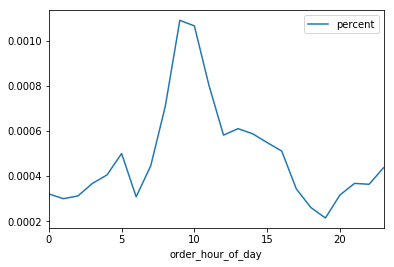

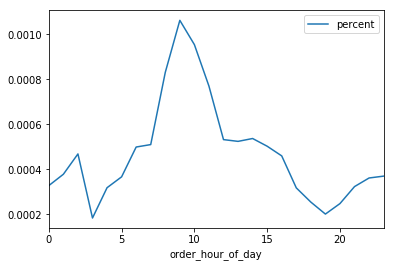

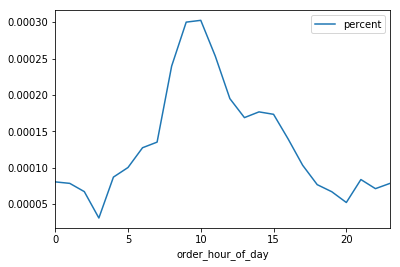

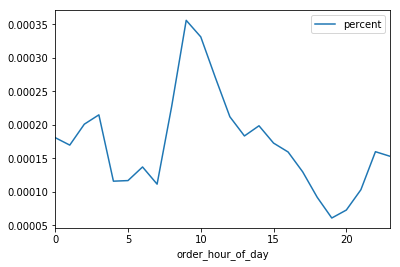

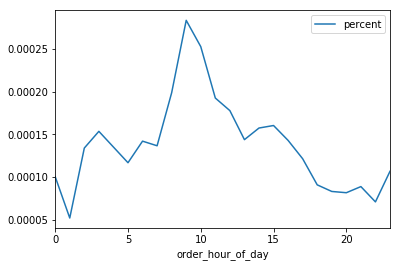

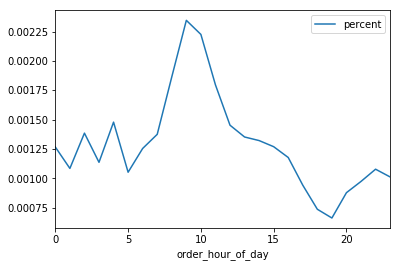

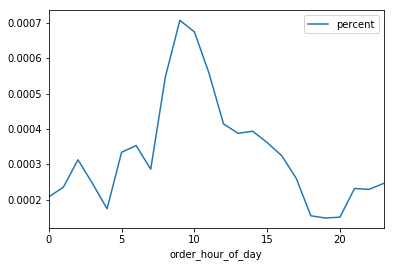

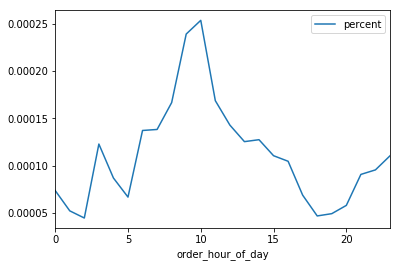

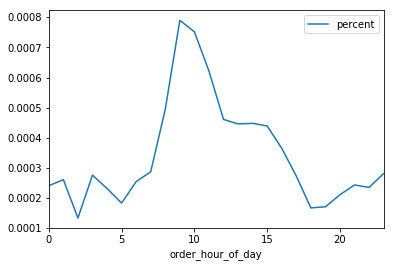

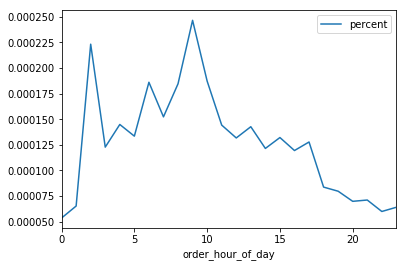

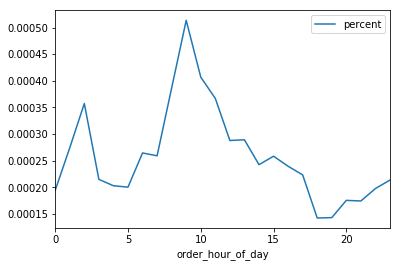

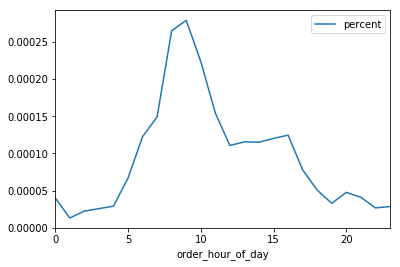

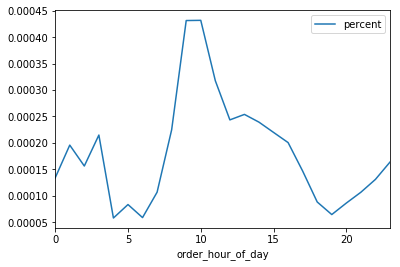

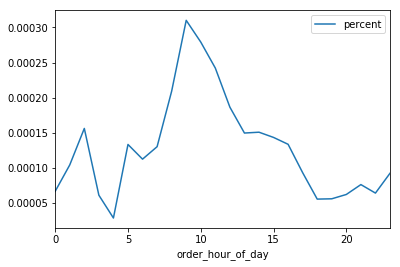

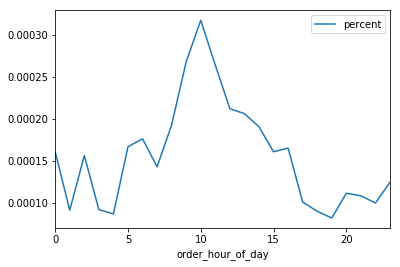

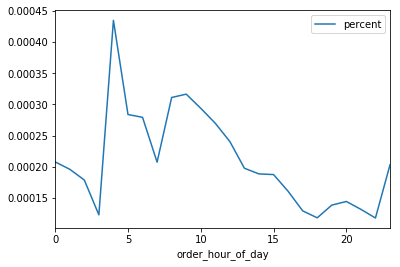

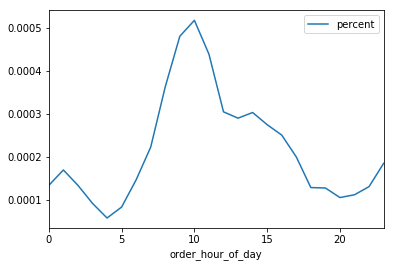

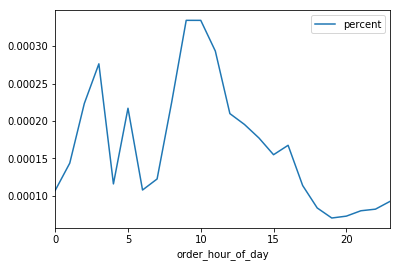

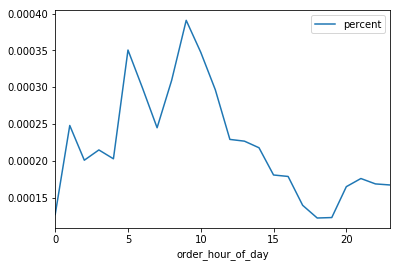

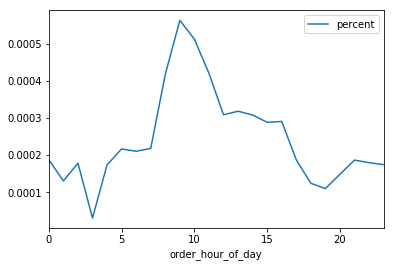

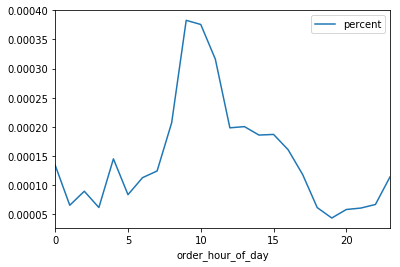

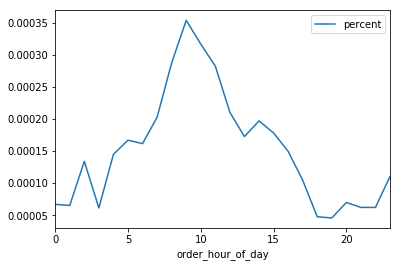

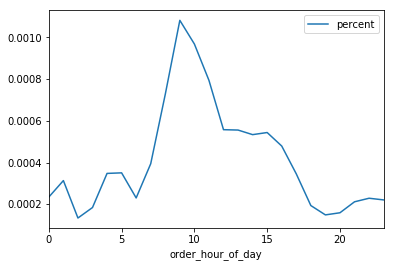

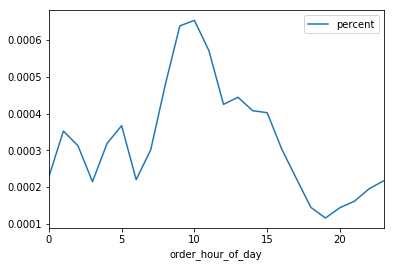

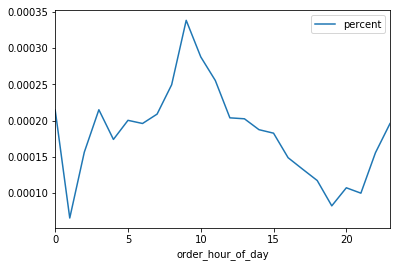

In [162]:
df_early.groupby('order_hour_of_day').plot();

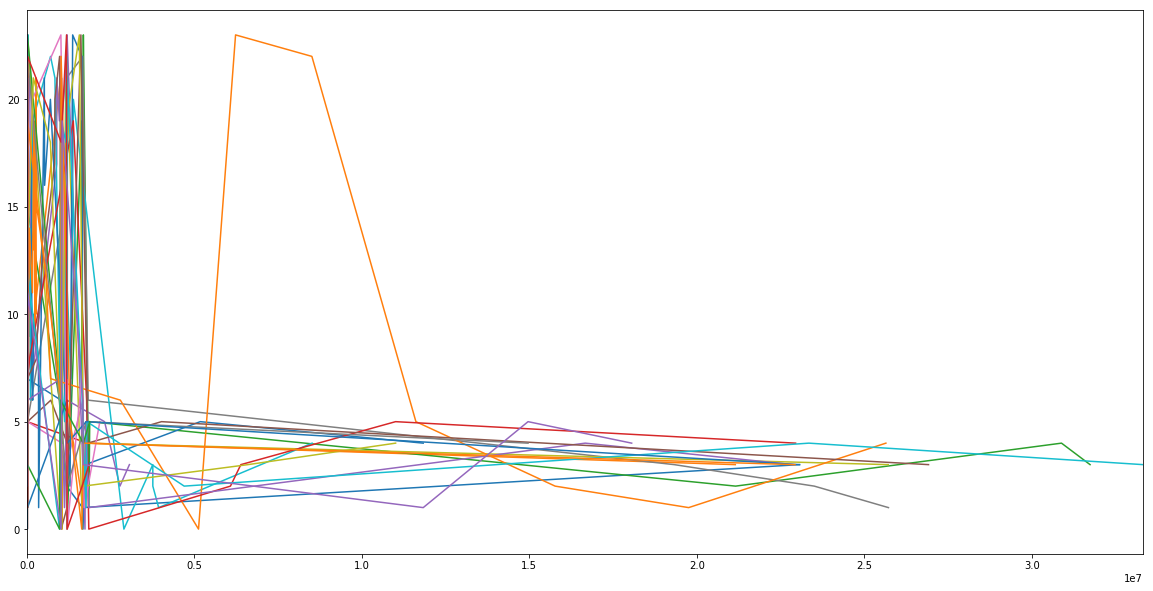

In [159]:
df_early.groupby('product_name')['order_hour_of_day'].plot(figsize=(20,10));